<a href="https://colab.research.google.com/github/alfonsocude/Analitica_Datos/blob/main/10-%5BTALLER%5D_Metricas_de_Evaluacion_de_modelos_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#Natalia Sarmiento y Joaquín Rodríguez

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/alfonsocude/Analitica_Datos/main/init.py
import init; init.init(force_download=False); 

replicating local resources


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 4.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Ejercicio 1: Contextualización del problema


Usaremos el dataset breast_cancer para el problema de clasificación. En el repositorio de sklearn se encuentra más información en el siguiente [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data.data
y = data.target

In [ ]:
print ("Número de muestras", x.shape[0])
print ("Número de variables", x.shape[1])
print ("Número de clases", len(np.unique(y)))

Número de muestras 569
Número de variables 30
Número de clases 2


Grafique un histograma de las variables de salida:

In [ ]:
#Ejercicio de código
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [ ]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.shape

(569, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effbee0de10>,
      dtype=object)

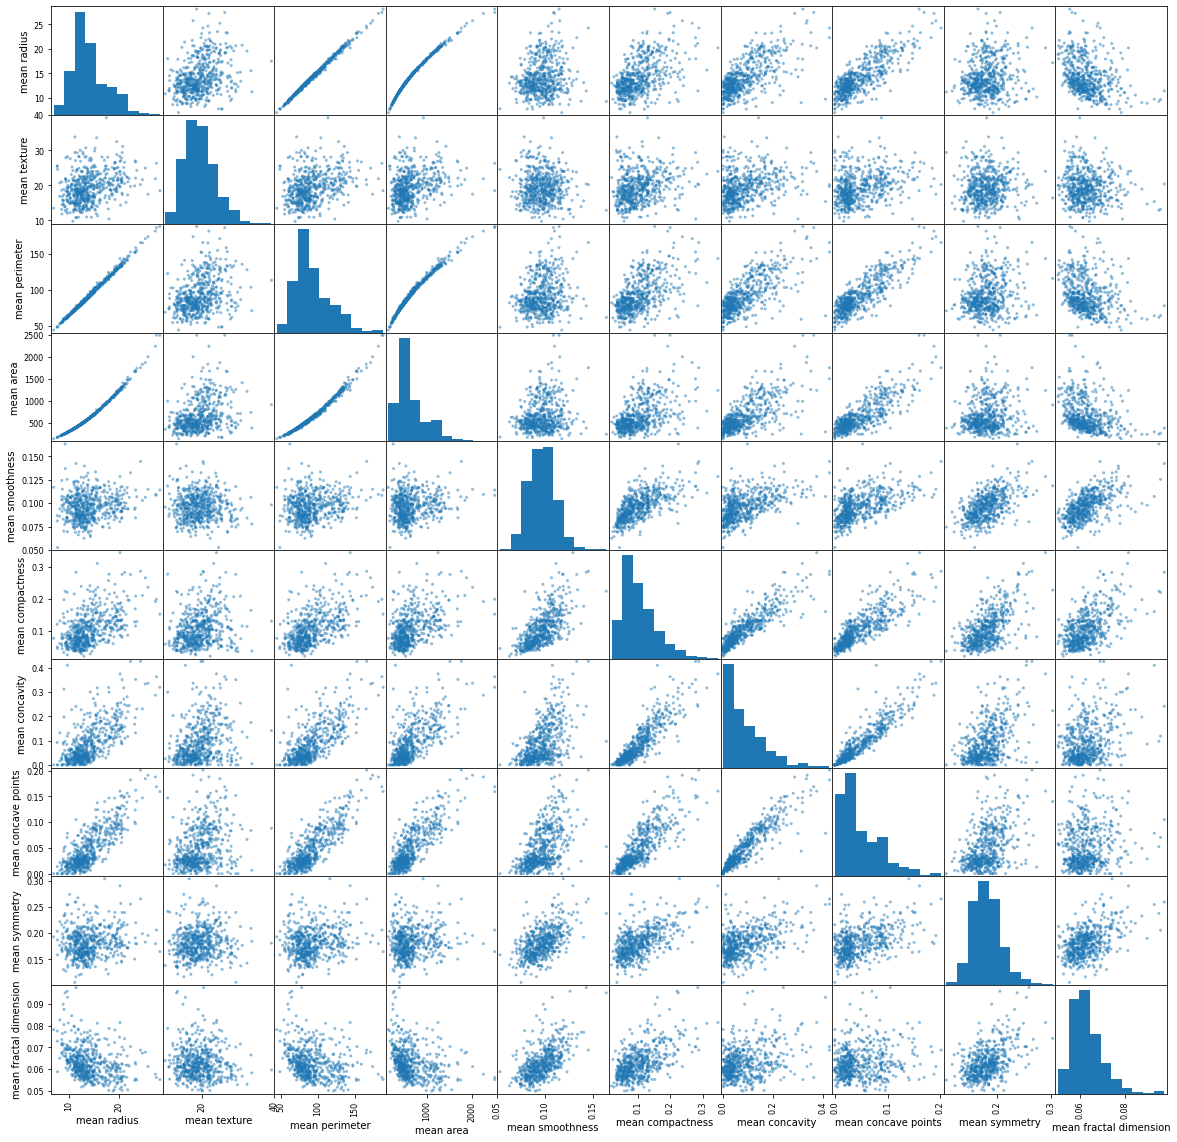

In [ ]:
pd.plotting.scatter_matrix(df.iloc[:,0:10], figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effbce26510>,
      dtype=object)

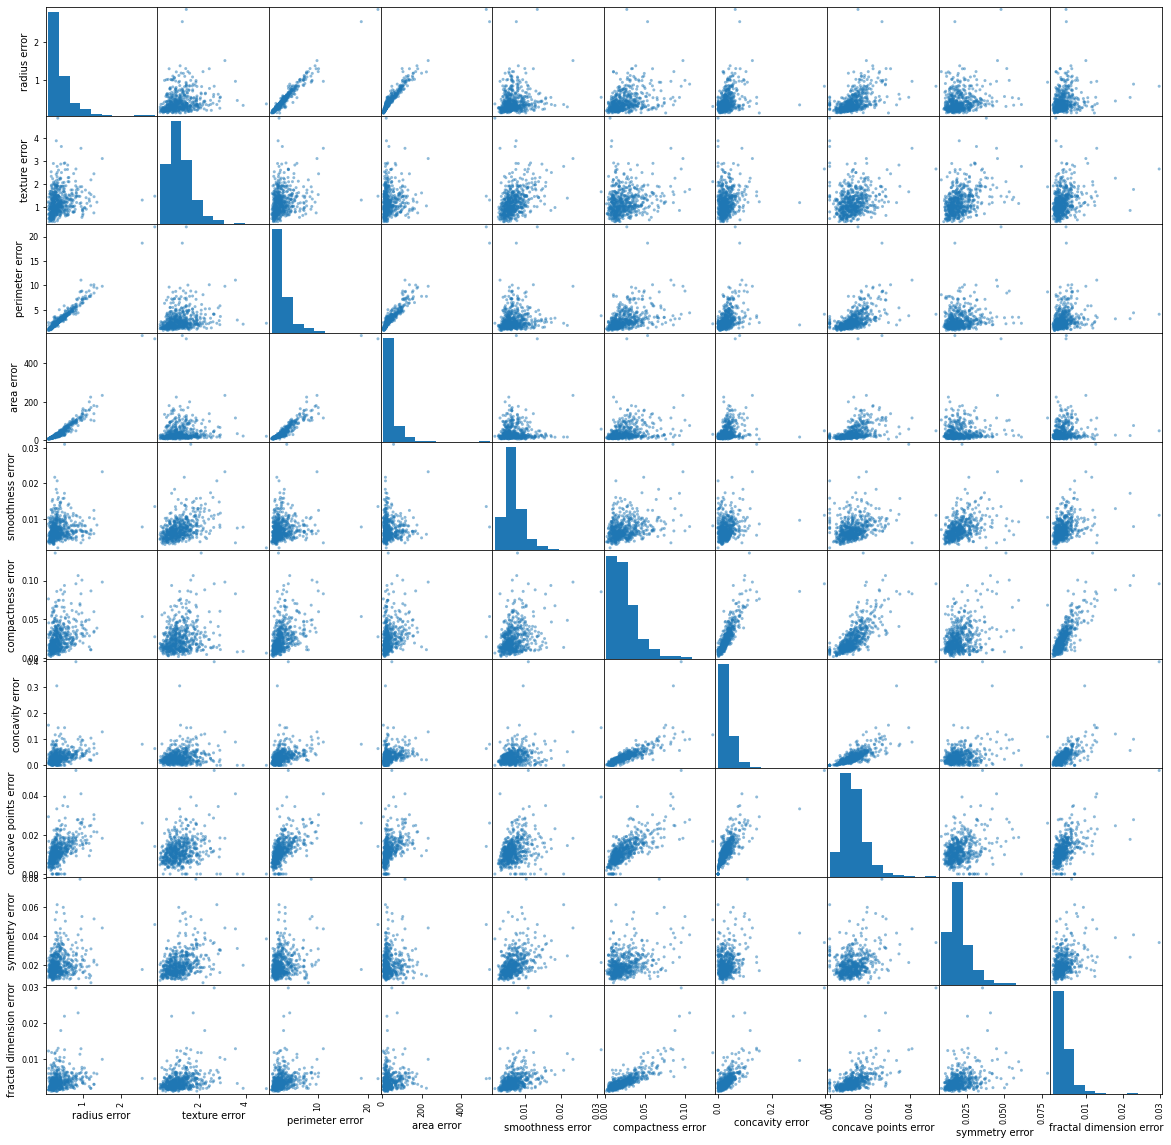

In [ ]:
pd.plotting.scatter_matrix(df.iloc[:,10:20], figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effbab1cb50>,
      dtype=object)

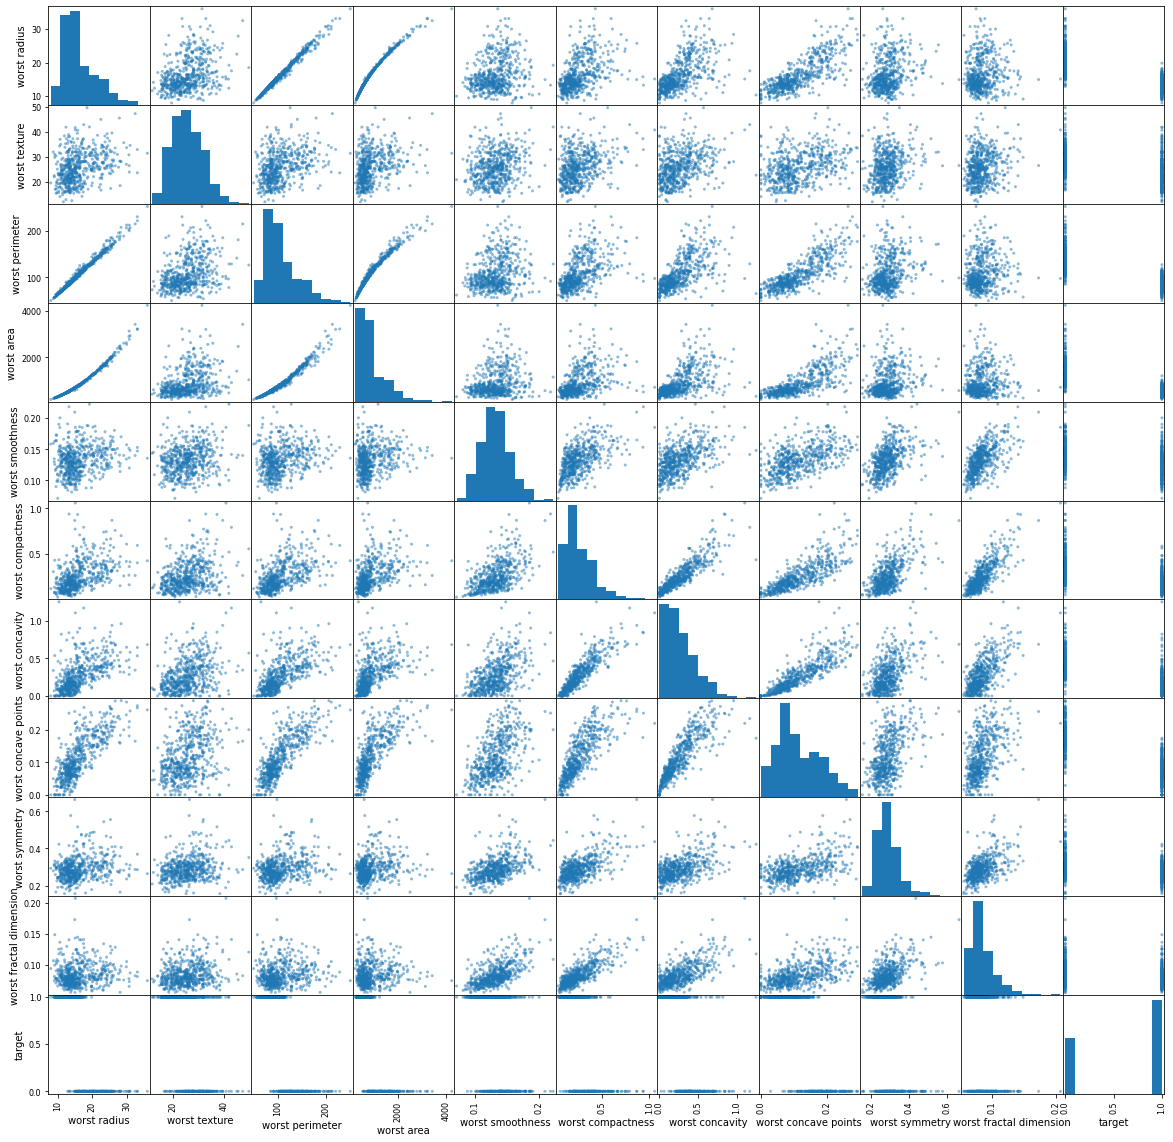

In [ ]:
pd.plotting.scatter_matrix(df.iloc[:,20:31], figsize = (20,20))

In [ ]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
212/(357+212)

0.37258347978910367

In [ ]:
357/(357+212)

0.6274165202108963

## Ejercicio 2: Entrenamiento y evaluación de modelos

En este ejercicio se usarán los modelos de regresión logística, Naïve Bayes y Discriminante Cuadrático para resolver el problema de predicción de cancer.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.iloc[:,0:30]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
Y = df['target']
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Vamos a usar una partición similar a las usados en talleres anteriores:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Recuerde estandarizar variables...

In [ ]:
#Ejercicio de código
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.fit_transform(X_test)

Instancie un objeto de cada uno de los modelos a comparar, use los parámetros por defecto para cada modelo y entrene el modelo con el conjunto X_train_n, y_train.

In [ ]:
#Ejercicio de código

clf1 = QuadraticDiscriminantAnalysis()
clf2 = GaussianNB()
clf3 = LogisticRegression()

In [ ]:
clf1.fit(X_train_n,Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
clf2.fit(X_train_n,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf3.fit(X_train_n,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_predict1 = clf1.predict(X_test_n)
Y_predict1

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.])

In [ ]:
Y_predict2 = clf2.predict(X_test_n)
Y_predict2

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

In [ ]:
Y_predict3 = clf3.predict(X_test_n)
Y_predict3

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [ ]:
Y_predict1_f = clf1.decision_function(X_test_n)
Y_predict3_f = clf3.decision_function(X_test_n)

A continuación cargaremos las métricas para evaluar los modelos:

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

Ejecute la siguiente para ver los resultados de los modelos

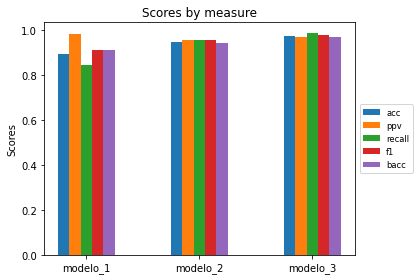

In [ ]:
labels = ['modelo_1', 'modelo_2', 'modelo_3']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(Y_test,clf1.predict(X_test_n)), accuracy_score(Y_test,clf2.predict(X_test_n)), accuracy_score(Y_test,clf3.predict(X_test_n))])
Performance.append([precision_score(Y_test,clf1.predict(X_test_n)), precision_score(Y_test,clf2.predict(X_test_n)), precision_score(Y_test,clf3.predict(X_test_n))])
Performance.append([recall_score(Y_test,clf1.predict(X_test_n)), recall_score(Y_test,clf2.predict(X_test_n)), recall_score(Y_test,clf3.predict(X_test_n))])
Performance.append([f1_score(Y_test,clf1.predict(X_test_n)), f1_score(Y_test,clf2.predict(X_test_n)), f1_score(Y_test,clf3.predict(X_test_n))])
Performance.append([balanced_accuracy_score(Y_test,clf1.predict(X_test_n)), balanced_accuracy_score(Y_test,clf2.predict(X_test_n)), balanced_accuracy_score(Y_test,clf3.predict(X_test_n))])

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿El desbalance observado en el conjunto de datos afectó el desempeño de los modelos?
respuesta_1 = "El desbalance si afectó significativamente el desempeño del modelo uno, pero hubo una muy pequeña variación en los otros 2 modelos." #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  Escoja una medida de desempeño global para evaluar el modelo. ¿Qué medida seleccionó? Justifique su respuesta.
respuesta_2 = "Seleccionamos como medida de desempeño global \"Balanced accuracy score\" ya que contamos con más muestras de la clase \"1\" en el conjunto de entrenamiento. " #@param {type:"string"}

Grafique la matriz de confusión normalizada para el mejor modelo de acuerdo con la medida de desempeño seleccionada  en la respuesta a la pregunta anterior. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Confusion matrix, without normalization
[[41  1]
 [11 61]]
Normalized confusion matrix
[[0.97619048 0.02380952]
 [0.15277778 0.84722222]]


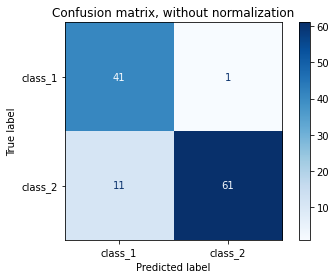

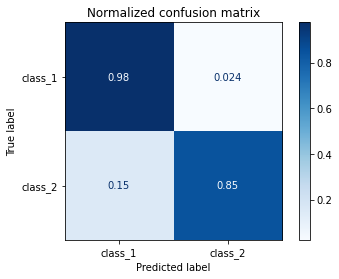

In [ ]:
#Ejercicio de código
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, X_test_n, Y_test,
                                 display_labels=['class_1','class_2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[39  3]
 [ 3 69]]
Normalized confusion matrix
[[0.92857143 0.07142857]
 [0.04166667 0.95833333]]


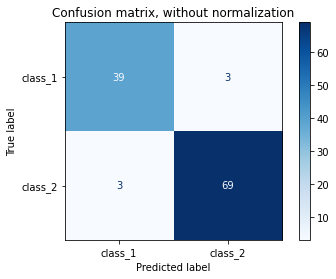

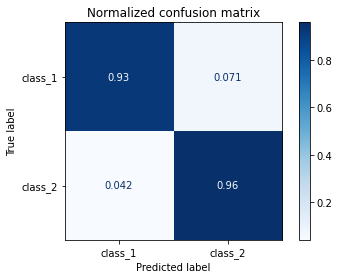

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf2, X_test_n, Y_test,
                                 display_labels=['class_1','class_2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[40  2]
 [ 1 71]]
Normalized confusion matrix
[[0.95238095 0.04761905]
 [0.01388889 0.98611111]]


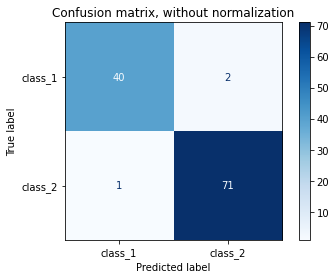

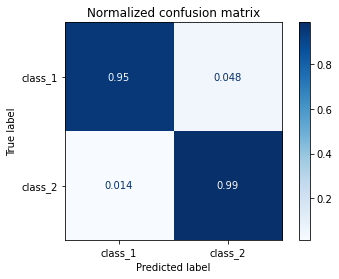

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, X_test_n, Y_test,
                                 display_labels=['class_1','class_2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
print("El mejor modelo es el 3")

El mejor modelo es el 3


Grafique en una misma figura las curvas ROC de los tres modelos e incluya en las etiquetas de la figura, el Area Bajo la curva obtenida para cada modelo. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

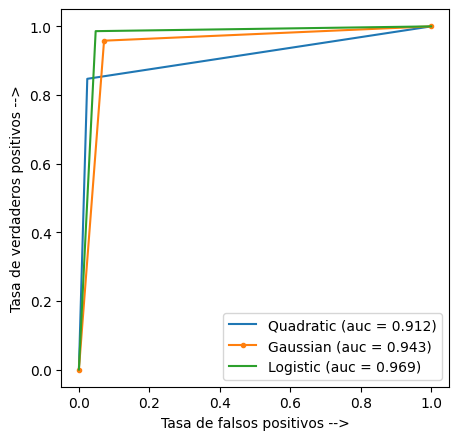

In [ ]:
from sklearn.metrics import roc_curve, auc
quadratic_fpr, quadratic_tpr, threshold = roc_curve(Y_test, Y_predict1)
auc_quadratic = auc(quadratic_fpr, quadratic_tpr)

gaussian_fpr, gaussian_tpr, threshold = roc_curve(Y_test, Y_predict2)
auc_gaussian = auc(gaussian_fpr, gaussian_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, Y_predict3)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(quadratic_fpr, quadratic_tpr, linestyle = '-', label = 'Quadratic (auc = %0.3f)' % auc_quadratic)
plt.plot(gaussian_fpr, gaussian_tpr, marker = '.', label = 'Gaussian (auc = %0.3f)' % auc_gaussian)
plt.plot(logistic_fpr, logistic_tpr, linestyle = '-', label = 'Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('Tasa de falsos positivos -->')
plt.ylabel('Tasa de verdaderos positivos -->')

plt.legend()
plt.show()